# Outliers & Anomalies Handling

In this section, I will check & handle potential anomalies & outliers found in the previous step.

## Outliers & Data Cleaning To-Do

---

### 1. **Type (Model)**

* **Check for:**

  * Ultra-rare types (long tail).
* **Action:**

  * Consider **grouping or flagging ultra-rare models** for modeling stability (especially if using non-tree models).
  * Otherwise, keep as-is for CatBoost.

---

### 2. **Region**

* **Check for:**

  * Extremely rare regions (almost none).
* **Action:**

  * No outlier handling needed, but can **combine rare regions into “Other”** if required for non-tree models.

---

### 3. **Make**

* **Check for:**

  * Makes with extremely few listings.
* **Action:**

  * Consider grouping ultra-rare makes if not using tree models.
  * Keep "Other" as its own category for business logic.

---

### 4. **Gear\_Type**

* **Action:**

  * No outlier handling required. Data is clean.

---

### 5. **Origin**

* **Action:**

  * No outlier handling required. Keep "Unknown" for business modeling.

---

### 6. **Options**

* **Action:**

  * No cleaning needed. Data is clean.

---

### 7. **Year**

* **Check for:**

  * Cars much older than market norm (e.g., before 1990).
  * Possible future year/invalid entries (data is 1963–2021, seems reasonable).
* **Action:**

  * Consider flagging **vintage outliers** (e.g., before 1990), decide to keep for "classic/vintage" market or remove as irrelevant for mass market.

---

### 8. **Engine\_Size**

* **Check for:**

  * Unrealistically small (<1.0L) or large (>9.0L) engine sizes.
* **Action:**

  * Remove or bin outliers if needed.

---

## **Summary Table (with Categorical Features)**

| Feature      | Outliers to Check / Special Cases | Cleaning/Handling Action                               |
| ------------ | --------------------------------- | ------------------------------------------------------ |
| Type         | Ultra-rare types                  | Flag/group for modeling if needed                      |
| Region       | Typos, rare regions               | Combine into "Other" if needed                         |
| Make         | Ultra-rare makes                  | keep "Other" as own category                           |
| Gear\_Type   | Erroneous values                  | None needed                                            |
| Origin       | Typos, "Unknown"                  | None needed                                            |
| Options      | Typos, invalid categories         | None needed                                            |
| Year         | Pre-1990, vintage outliers        | Flag/classify/remove very old cars if irrelevant       |
| Engine\_Size | <1.0L or >9.0L                    | Remove or bin                                          |
| Mileage      | >500k km, >1M km, <1k km          | Remove/cap high, correct/remove errors                 |
| Price        | <1k SAR, <5k SAR, >600k/1M SAR    | Remove/impute low, validate high, log-transform for ML |

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_filtered = pd.read_csv('../data/filtered_data_saudi_used_cars.csv')
df_filtered.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000


In [11]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3824 non-null   object 
 1   Region       3824 non-null   object 
 2   Make         3824 non-null   object 
 3   Gear_Type    3824 non-null   object 
 4   Origin       3824 non-null   object 
 5   Options      3824 non-null   object 
 6   Year         3824 non-null   int64  
 7   Engine_Size  3824 non-null   float64
 8   Mileage      3824 non-null   int64  
 9   Negotiable   3824 non-null   bool   
 10  Price        3824 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 302.6+ KB


## Year

To-do: Create `Car_Age` feature

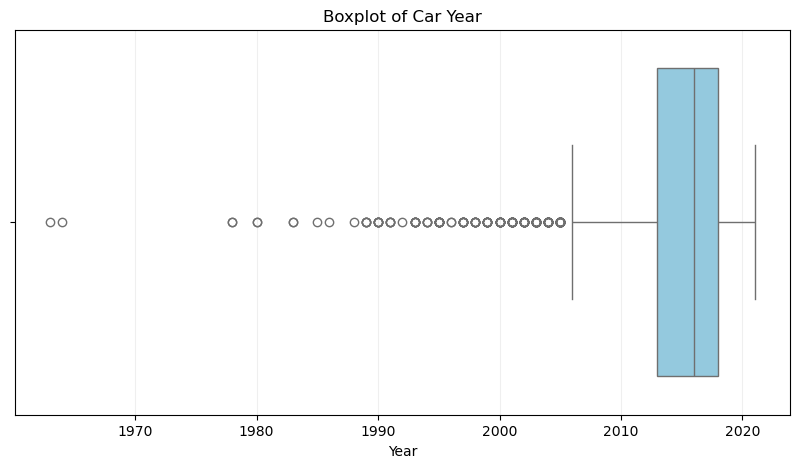

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_filtered['Year'], color='skyblue')
plt.title('Boxplot of Car Year')
plt.xlabel('Year')
plt.grid(axis='x', alpha=0.2)
plt.show()

In [48]:
vintage_cars = df_filtered[df_filtered['Year'] < 2000]
vintage_cars

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
42,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,False,5500
58,Suburban,Al-Medina,Chevrolet,Automatic,Other,Full,1999,5.3,70000,False,20000
117,Suburban,Riyadh,GMC,Automatic,Saudi,Semi Full,1995,5.3,215000,False,13000
190,S,Al-Jouf,Mercedes,Automatic,Other,Full,1993,3.0,138,False,22000
205,Land Cruiser Pickup,Aseer,Toyota,Manual,Saudi,Standard,1983,1.5,2580,False,15000
...,...,...,...,...,...,...,...,...,...,...,...
3711,Datsun,Riyadh,Nissan,Manual,Saudi,Standard,1989,2.4,249,False,11000
3720,Fleetwood,Al-Ahsa,Cadillac,Automatic,Other,Full,1990,5.0,109000,False,48000
3750,Suburban,Al-Medina,Chevrolet,Automatic,Other,Semi Full,1997,6.0,292764,False,4000
3759,Savana,Jeddah,GMC,Automatic,Other,Full,1999,1.5,200000,False,11500


In [10]:
vintage_percentage = len(vintage_cars) / len(df_filtered) * 100
print(f"Vintage cars make up {vintage_percentage:.2f}% of all cars.")

Vintage cars make up 1.94% of all cars.


<Axes: xlabel='Year'>

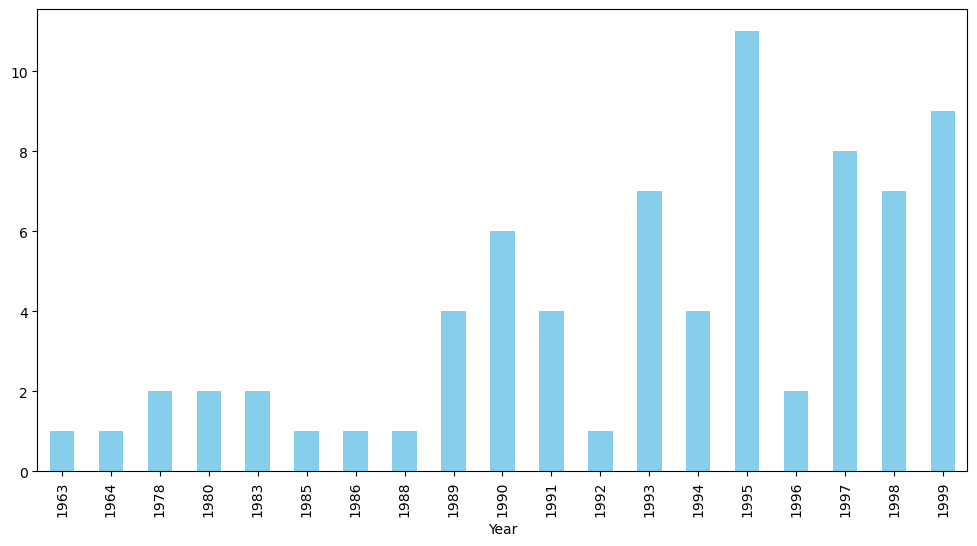

In [9]:
vintage_cars['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='skyblue')

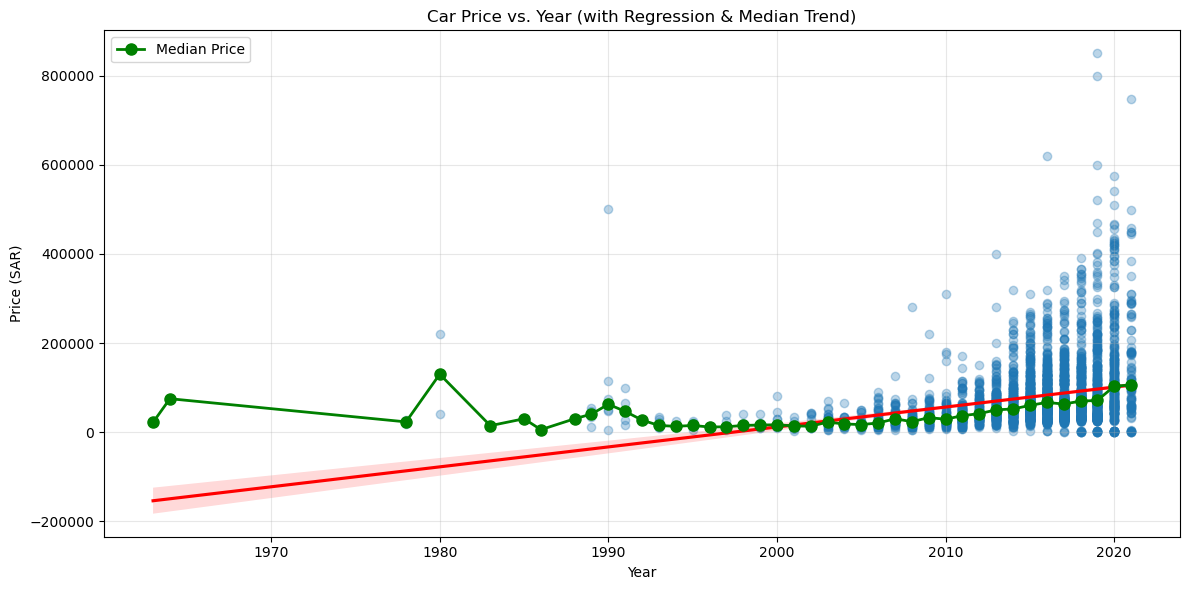

In [24]:
# Set up the figure for Year-Price relationship
plt.figure(figsize=(12, 6))

# Create a scatter plot with best fit line
sns.regplot(x='Year', y='Price', data=df_filtered, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

# Add a boxplot to show distribution by year
years = sorted(df_filtered['Year'].unique())
medians = df_filtered.groupby('Year')['Price'].median().reindex(years)

# Plot median points
plt.plot(years, medians, 'o-', color='green', linewidth=2, markersize=8, label='Median Price')

plt.title('Car Price vs. Year (with Regression & Median Trend)')
plt.xlabel('Year')
plt.ylabel('Price (SAR)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

#### Vintage Cars (Year < 2000)

Listings with manufacturing years before 2000 represent a small portion of the dataset and exhibit irregular pricing patterns that differ significantly from the modern used-car market. While these entries may be considered outliers due to their age and atypical behavior, they are retained in the dataset. Ideally, these rows are removed since it is a different scope than the normal used cars market and it would need a specialized model for vintage cars.

However, with limited options, instead of removing them, I introduce a dedicated `IsVintage` feature during feature engineering to help the model recognize and handle these cases separately without distorting the learning process for the majority of listings. This way, the model will still be able to handle these values in the real world data.

## Engine Size

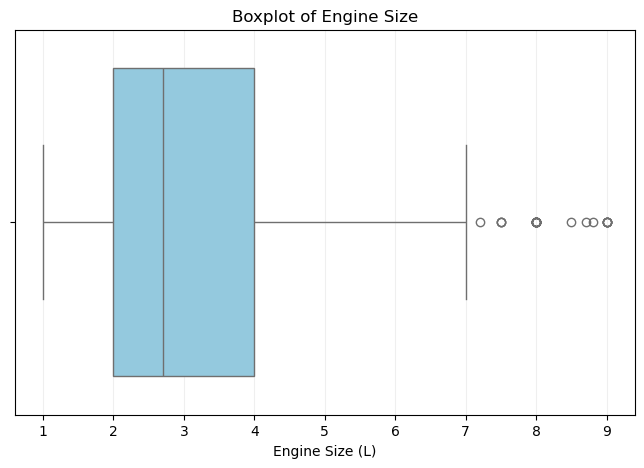

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered['Engine_Size'], color='skyblue')
plt.title('Boxplot of Engine Size')
plt.xlabel('Engine Size (L)')
plt.grid(axis='x', alpha=0.2)
plt.show()

There is no problem on the left tail of Engine Size distribution. Normal cars have engine size ranging from 1.0-3.0L, while high-end / luxury cars can have an engine size as high as 7.0L. For example, [Rolls-Royce Camargue is produced with an engine size of around 6.75L](https://www.automobile-catalog.com/model/rolls-royce/camargue.html), matching the data that we have.

In [49]:
df_filtered[df_filtered['Make'] == 'Rolls-Royce']

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
370,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2010,6.0,175000,False,310000
1438,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,False,620000
2068,Camargue,Dammam,Rolls-Royce,Automatic,Saudi,Full,1990,6.7,5000,False,500000


Although cars with engine size higher than 7.0L exist, they are quite rare and most likely customized/not built for regular/usual use. So, I need to inspect these 'extreme' values of engine size.

In [41]:
big_engine_cars = df_filtered[df_filtered['Engine_Size'] > 7.0]
big_engine_cars

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
39,Camry,Taef,Toyota,Automatic,Saudi,Semi Full,2001,9.0,150000,False,15000
402,G,Riyadh,Mercedes,Automatic,Saudi,Full,2015,8.8,213000,False,240000
437,E,Jeddah,Mercedes,Manual,Other,Semi Full,2017,9.0,134000,False,155000
505,LX,Taef,Lexus,Automatic,Gulf Arabic,Full,2018,7.5,122000,False,340000
603,Cadillac,Riyadh,Classic,Automatic,Saudi,Full,1995,8.0,119,False,25000
653,D-MAX,Abha,Isuzu,Manual,Saudi,Full,2019,7.5,40000,False,125000
716,F150,Riyadh,Ford,Automatic,Saudi,Standard,2014,8.0,147000,False,80000
786,Land Cruiser,Hail,Toyota,Automatic,Saudi,Full,2008,8.0,295000,False,65000
813,Other,Qassim,Other,Manual,Other,Full,2019,8.0,24643,False,330000


In [42]:
big_engine_cars['Make'].value_counts()

Make
Toyota        6
GMC           5
Chevrolet     5
Mercedes      3
Isuzu         2
Ford          2
Lexus         1
Classic       1
Other         1
Cadillac      1
Land Rover    1
Jeep          1
Dodge         1
Name: count, dtype: int64

In [50]:
big_engine_cars[big_engine_cars['Type'] == 'Camry']

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
39,Camry,Taef,Toyota,Automatic,Saudi,Semi Full,2001,9.0,150000,False,15000
1498,Camry,Jeddah,Toyota,Automatic,Saudi,Semi Full,2014,9.0,106000,False,36000


If we take Toyota Camry for example, which is listed with a 9.0L engine in the data above, it doesn't quite match with the normally produced Toyota Camry. The biggest engine size in a normal Toyota Camry I could find on the internet is a [2021 Toyota Camry with an engine size of 3.5L](https://www.toyotaofanaheim.com/2021-toyota-camry-engine-specs/#:~:text=Horsepower%20of%20the%20Camry,the%20power%20you%27d%20expect.).

However, there is still a possibility that there are customized cars (with engine swapped) being sold on the website, and removing cars with engine size > 7.0L might ended up removing valid cars (e.g. Customized Rolls-Royce can easily touch 7.0L engine size, added with the existence of almost 9.0L produced Rolls-Royce).

So, instead of removing these 'outliers', I'll tag them instead so the model know that these engine sizes are unnatural.

#### Large Engine Size Outliers Summary

A small number of listings in the dataset report exceptionally large engine sizes (> 7.0L), which exceed the typical range found in most production vehicles. While these values may reflect rare high-performance, customized, or imported models, they can be considered outliers relative to the mainstream market.

Instead of removing these listings, I retain them and introduce an `IsBigEngine` binary feature (1 if Engine_Size > 7.0L, else 0) in the next Feature Engineering section. This approach preserves potentially valuable information about rare, high-engine-capacity vehicles without allowing these outliers to distort price predictions for the majority of listings.

## Mileage

Based on the latest data, it is assumed that [the national average vehicle kilometers traveled (VKT) in Saudi Arabia is 25.000 kilometers 
(km) per car](https://www.kapsarc.org/wp-content/uploads/2023/06/KS-2023-DP13-Estimating-Regional-Variation-in-Saudi-Arabias-Energy-Usage-and-Carbon-Emissions.pdf).

In [53]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    print("Mileage descriptive stats:")
    print(df_filtered['Mileage'].describe())
    
print("Lowest 5 mileage values:")
print(df_filtered['Mileage'].nsmallest(5))
print("Highest 5 mileage values:")
print(df_filtered['Mileage'].nlargest(5))

Mileage descriptive stats:
count        3,824.00
mean       142,621.11
std        378,394.15
min            100.00
25%         48,000.00
50%        103,000.00
75%        183,000.00
max     20,000,000.00
Name: Mileage, dtype: float64
Lowest 5 mileage values:
156     100
574     100
762     100
863     100
2093    100
Name: Mileage, dtype: int64
Highest 5 mileage values:
2320    20000000
384      4500000
2859     3640000
955      3500000
3097     3300000
Name: Mileage, dtype: int64


There are possible anomalies if we look at the descriptive statistics for Mileage. For example, there are many cars with only 100km mileage, while there's also a car with 20 million km mileage, which means the car has been running for 800 years(!) if we are using the national average VKT. This kind of value is impossible and should be removed.

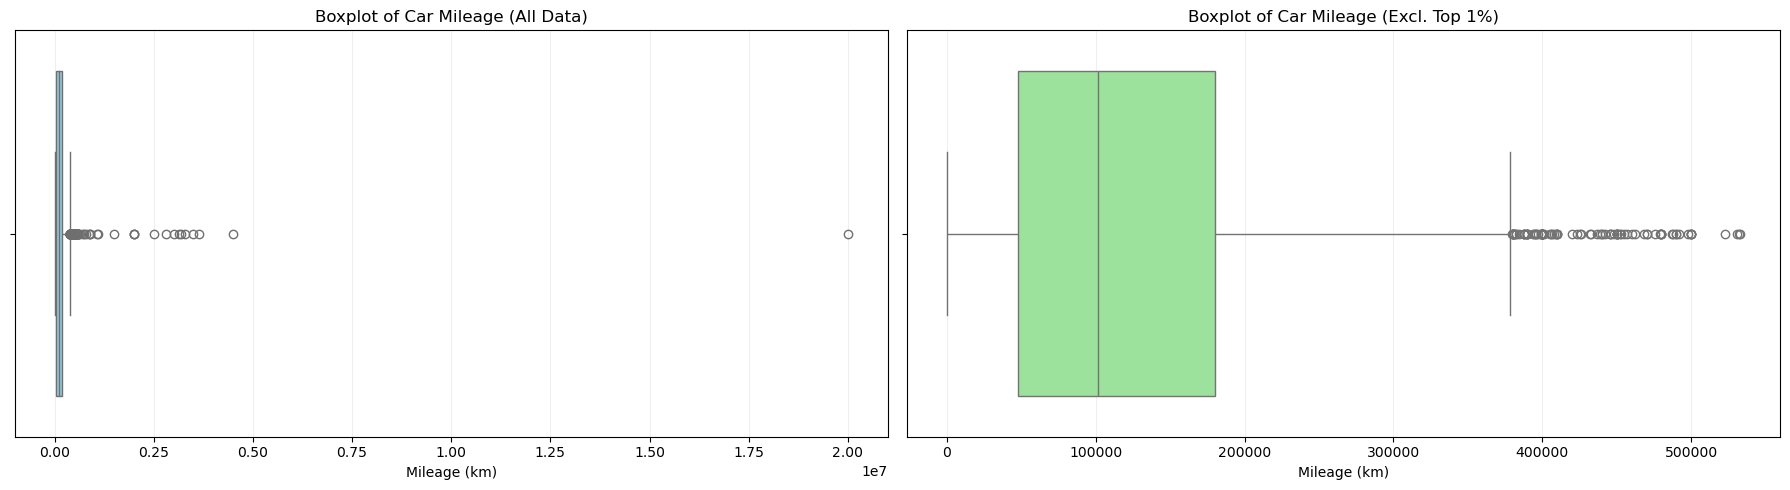

In [55]:
plt.figure(figsize=(18, 5))

# Full data boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_filtered['Mileage'], color='skyblue')
plt.title('Boxplot of Car Mileage (All Data)')
plt.xlabel('Mileage (km)')
plt.grid(axis='x', alpha=0.2)

# Exclude top 1%
mileage_99 = df_filtered['Mileage'].quantile(0.99)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered[df_filtered['Mileage'] <= mileage_99]['Mileage'], color='lightgreen')
plt.title('Boxplot of Car Mileage (Excl. Top 1%)')
plt.xlabel('Mileage (km)')
plt.grid(axis='x', alpha=0.2)

plt.tight_layout()
plt.show()

In [63]:
import numpy as np

current_year = 2022  # dataset's latest year
car_ages = current_year - df_filtered['Year']

mean_age = car_ages.mean()
median_age = car_ages.median()

print(f"Mean car age: {mean_age:.2f} years")
print(f"Median car age: {median_age:.2f} years")

national_mean_VKT = 25000  # km/year
expected_mean_mileage = mean_age * national_mean_VKT
expected_median_mileage = median_age * national_mean_VKT

print(f"Expected mean mileage (assuming 25,000 km/year): {expected_mean_mileage:,.0f} km")
print(f"Expected median mileage (assuming 25,000 km/year): {expected_median_mileage:,.0f} km")

Mean car age: 7.15 years
Median car age: 6.00 years
Expected mean mileage (assuming 25,000 km/year): 178,720 km
Expected median mileage (assuming 25,000 km/year): 150,000 km


In [64]:
small_mileage_cars = df_filtered[df_filtered['Mileage'] < national_mean_VKT]
big_mileage_cars = df_filtered[df_filtered['Mileage'] > 400000]

In [71]:
small_mileage_cars.sort_values(by='Mileage', ascending=True).head(20)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
863,Delta,Aseer,Daihatsu,Manual,Saudi,Full,2014,3.7,100,False,35000
2890,CT4,Jeddah,Cadillac,Automatic,Gulf Arabic,Semi Full,2020,3.7,100,False,159000
2093,Defender,Jeddah,Land Rover,Automatic,Saudi,Full,2021,3.0,100,False,450000
3405,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.5,100,False,72910
574,Yaris,Yanbu,Toyota,Automatic,Saudi,Standard,2016,1.5,100,False,32000
3563,Sierra,Dammam,GMC,Automatic,Saudi,Full,2021,9.0,100,False,178000
3093,S,Dammam,Mercedes,Automatic,Saudi,Semi Full,2000,3.0,100,False,15000
156,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
2382,Cadenza,Tabouk,Kia,Automatic,Gulf Arabic,Full,2016,3.3,100,False,77000
762,CT5,Jeddah,Cadillac,Automatic,Gulf Arabic,Semi Full,2021,2.0,100,False,179000


In [72]:
big_mileage_cars.sort_values(by='Mileage', ascending=False).head(20)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
2320,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,False,9000
384,Camry,Yanbu,Toyota,Automatic,Other,Full,1998,2.5,4500000,False,15000
2859,Innova,Riyadh,Toyota,Manual,Saudi,Standard,2013,2.7,3640000,False,30000
955,Trailblazer,Jeddah,Chevrolet,Automatic,Other,Full,2004,5.3,3500000,False,10000
3097,Tahoe,Riyadh,Chevrolet,Automatic,Saudi,Semi Full,2008,5.7,3300000,False,27000
623,Pathfinder,Riyadh,Nissan,Automatic,Saudi,Standard,1998,3.5,3180003,False,10500
3316,Pathfinder,Riyadh,Nissan,Automatic,Saudi,Full,2008,2.6,3150000,False,20000
2308,Fusion,Hail,Ford,Automatic,Saudi,Full,2010,2.5,3000000,False,17000
898,Prado,Makkah,Toyota,Manual,Saudi,Semi Full,2006,4.0,2800000,False,35000
2598,Marquis,Riyadh,Ford,Automatic,Saudi,Semi Full,2005,4.6,2500000,False,9000


#### Outlier Detection with Mileage per Year

To improve data quality and avoid removing rare but valid older vehicles, we use `Mileage per Year` (total mileage divided by age) as an additional check for outlier detection. Listings with implausibly high usage rates (e.g., >100.000 km/year) are flagged and removed as appropriate. After cleaning, we retain and use total mileage as the primary input for modeling, as it is the most intuitive and relevant metric for buyers and sellers in the Saudi used-car market.

Low mileage (even very low like 100km) will be left as is, as a low mileage is still a realistic case especially for people who buy cars only for collecting and/or reselling purposes.

In [80]:
df_filtered['Mileage_per_Year'] = df_filtered['Mileage'] / car_ages.replace(0, 1)

In [78]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    print(df_filtered['Mileage_per_Year'].describe())

count       3,824.00
mean       20,245.35
std        30,467.35
min             4.26
25%        10,653.85
50%        18,354.17
75%        26,385.84
max     1,538,461.54
Name: Mileage_per_Year, dtype: float64


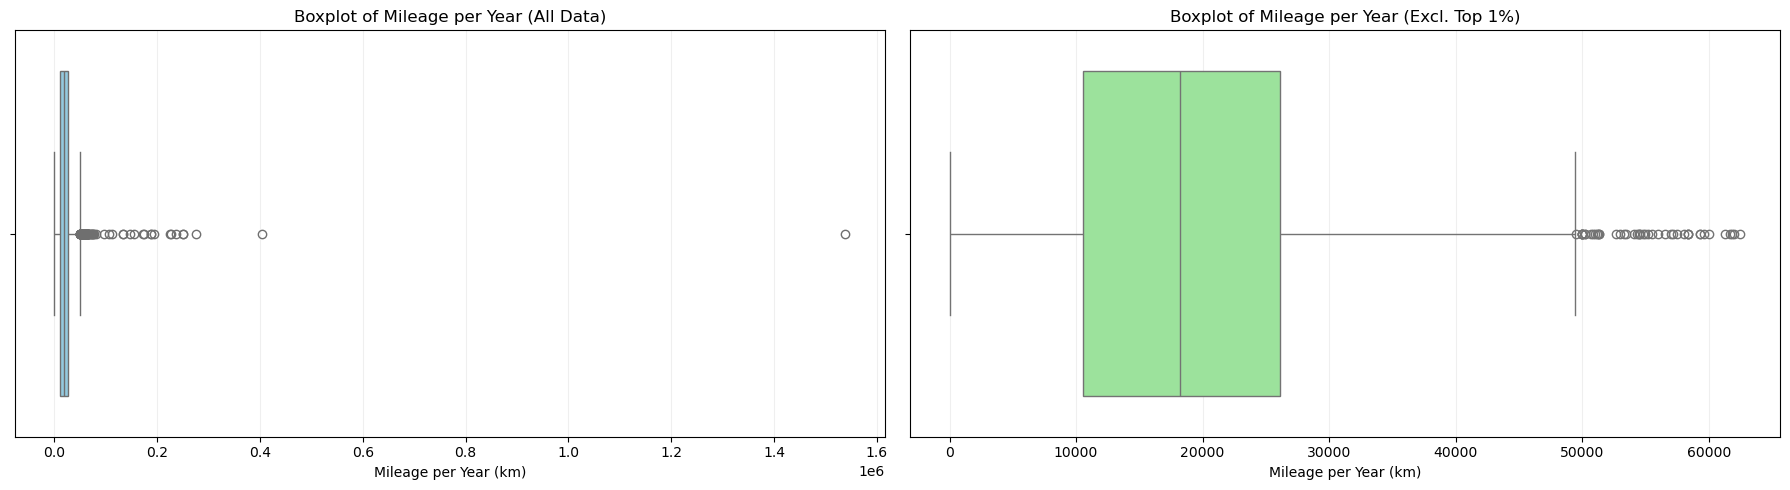

In [79]:
plt.figure(figsize=(18, 5))

# Full data boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_filtered['Mileage_per_Year'], color='skyblue')
plt.title('Boxplot of Mileage per Year (All Data)')
plt.xlabel('Mileage per Year (km)')
plt.grid(axis='x', alpha=0.2)

# Exclude top 1%
mileage_per_year_99 = df_filtered['Mileage_per_Year'].quantile(0.99)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered[df_filtered['Mileage_per_Year'] <= mileage_per_year_99]['Mileage_per_Year'], color='lightgreen')
plt.title('Boxplot of Mileage per Year (Excl. Top 1%)')
plt.xlabel('Mileage per Year (km)')
plt.grid(axis='x', alpha=0.2)

plt.tight_layout()
plt.show()

In [ ]:
# Detect high-usage outliers
df_filtered['Unnatural_High_Mileage_Flag'] = df_filtered['Mileage_per_Year'] > (national_mean_VKT * 4) # 100 thousand km/year
df_filtered['Unnatural_High_Mileage_Flag'].value_counts()

Unnatural_High_Mileage_Flag
False    3805
True       19
Name: count, dtype: int64

In [85]:
cols = ['Type', 'Origin', 'Year', 'Engine_Size', 'Mileage', 'Price', 'Mileage_per_Year', 'Unnatural_High_Mileage_Flag']
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df_filtered[df_filtered['Unnatural_High_Mileage_Flag']][cols].sort_values(by='Mileage_per_Year', ascending=False))

,Type,Origin,Year,Engine_Size,Mileage,Price,Mileage_per_Year,Unnatural_High_Mileage_Flag
2320,Optra,Other,2009,1.60,20000000,9000,"1,538,461.54",True
2859,Innova,Saudi,2013,2.70,3640000,30000,"404,444.44",True
298,Azera,Saudi,2018,3.50,1100000,80000,"275,000.00",True
1434,Optima,Saudi,2014,2.50,2002500,42000,"250,312.50",True
2308,Fusion,Saudi,2010,2.50,3000000,17000,"250,000.00",True
3097,Tahoe,Saudi,2008,5.70,3300000,27000,"235,714.29",True
2166,LX,Gulf Arabic,2020,5.70,455000,455000,"227,500.00",True
3316,Pathfinder,Saudi,2008,2.60,3150000,20000,"225,000.00",True
955,Trailblazer,Other,2004,5.30,3500000,10000,"194,444.44",True
384,Camry,Other,1998,2.50,4500000,15000,"187,500.00",True


These 19 listings represent cars with an 'impossible' rate of mileage, making these cars seem dubious and can very much be invalid listings (data-entry errors, etc.). Therefore, we will remove these listings as to not ruin the pattern for the predictive models.

In [88]:
df_filtered_clean_mileage = df_filtered[~df_filtered['Unnatural_High_Mileage_Flag']].copy()
print(df_filtered_clean_mileage.info())
print(df_filtered_clean_mileage['Unnatural_High_Mileage_Flag'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 3805 entries, 0 to 3823
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         3805 non-null   object 
 1   Region                       3805 non-null   object 
 2   Make                         3805 non-null   object 
 3   Gear_Type                    3805 non-null   object 
 4   Origin                       3805 non-null   object 
 5   Options                      3805 non-null   object 
 6   Year                         3805 non-null   int64  
 7   Engine_Size                  3805 non-null   float64
 8   Mileage                      3805 non-null   int64  
 9   Negotiable                   3805 non-null   bool   
 10  Price                        3805 non-null   int64  
 11  Mileage_per_Year             3805 non-null   float64
 12  Unnatural_High_Mileage_Flag  3805 non-null   bool   
dtypes: bool(2), float64(2),

## Price

In [92]:
# 1. Descriptive statistics
with pd.option_context('display.float_format', '{:,.2f}'.format):
    print("Price descriptive stats:")
    print(df_filtered_clean_mileage['Price'].describe())
    
print("Lowest 5 price values:")
print(df_filtered_clean_mileage['Price'].nsmallest(5))
print("Highest 5 price values:")
print(df_filtered_clean_mileage['Price'].nlargest(5))

Price descriptive stats:
count     3,805.00
mean     78,144.31
std      72,581.44
min           1.00
25%      35,000.00
50%      58,000.00
75%      95,000.00
max     850,000.00
Name: Price, dtype: float64
Lowest 5 price values:
2130      1
2725    500
3003    850
3475    884
2370    950
Name: Price, dtype: int64
Highest 5 price values:
2401    850000
3191    800000
2912    748000
1438    620000
3173    599000
Name: Price, dtype: int64


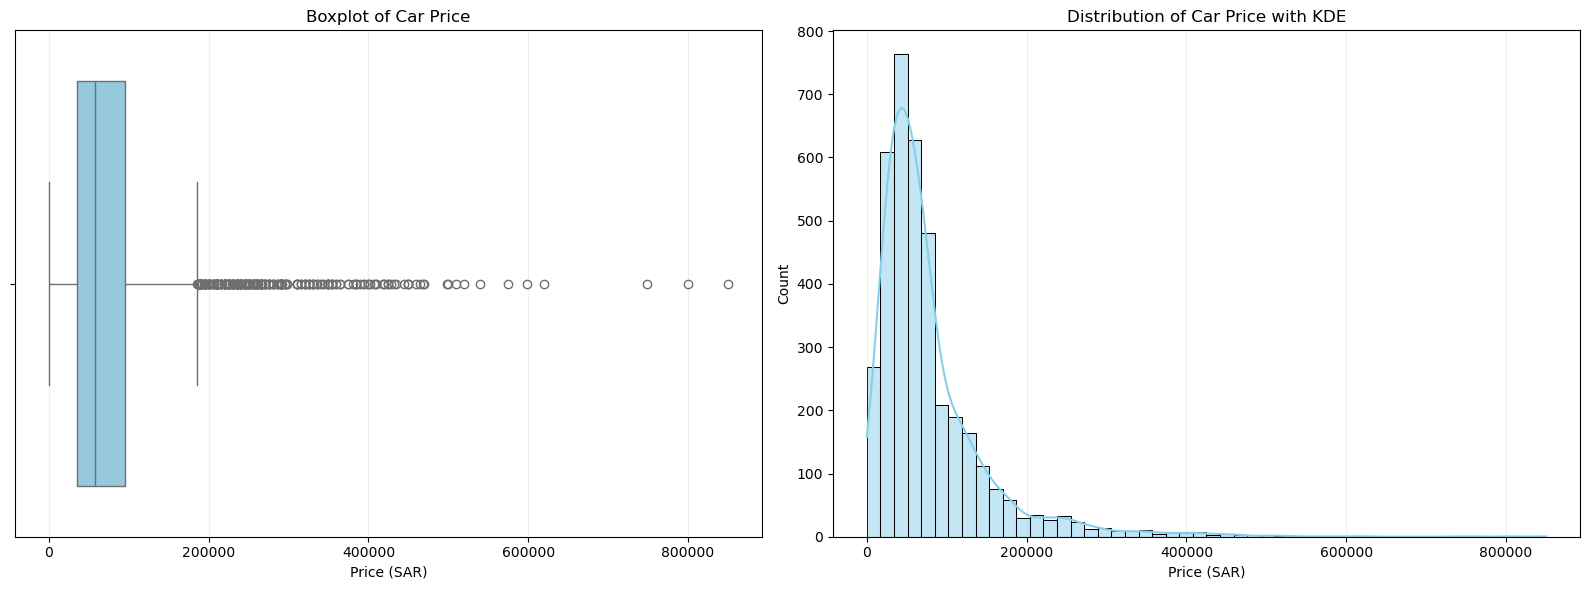

In [95]:
plt.figure(figsize=(16, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_filtered_clean_mileage['Price'], color='skyblue')
plt.title('Boxplot of Car Price')
plt.xlabel('Price (SAR)')
plt.grid(axis='x', alpha=0.2)

# Distribution with KDE
plt.subplot(1, 2, 2)
sns.histplot(df_filtered_clean_mileage['Price'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Car Price with KDE')
plt.xlabel('Price (SAR)')
plt.ylabel('Count')
plt.grid(axis='x', alpha=0.2)

plt.tight_layout()
plt.show()

In [101]:
# Calculate the 99.9th percentile of Price
price_999 = df_filtered_clean_mileage['Price'].quantile(0.999)

# Show data with Price above 99.9th percentile
high_price_cars = df_filtered_clean_mileage[df_filtered_clean_mileage['Price'] > price_999].sort_values(by='Price', ascending=False)
display(high_price_cars)

# Calculate the 0.1th percentile of Price
price_001 = df_filtered_clean_mileage['Price'].quantile(0.001)

# Show data with Price below 0.1th percentile
low_price_cars = df_filtered_clean_mileage[df_filtered_clean_mileage['Price'] < price_001].sort_values(by='Price', ascending=True)
display(low_price_cars)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Mileage_per_Year,Unnatural_High_Mileage_Flag
2401,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,False,850000,4333.333333,False
3191,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,False,800000,13000.000000,False
2912,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,False,748000,2500.000000,False
1438,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,False,620000,6666.666667,False


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Mileage_per_Year,Unnatural_High_Mileage_Flag
2130,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,False,1,16666.666667,False
2725,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,False,500,42500.000000,False
3003,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,False,850,25000.000000,False
3475,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,False,884,18500.000000,False


Looking at the top 0.1% prices, these listings are actually valid since they contain very high-end cars (Bentley, Mercedes, Rolls-Royce). With the Type & Make as the features, these prices will be of no problem.

However, looking at the bottom 0.1% prices, things are different. A car being listed at 1 SAR is the same as selling it for free. It could also be a way of the seller to say "Call me to negotiate the price ourselves" because the seller does not want the price to be negotiated in the website for some reasons. These possibilities make these listings arguably invalid. So, I will remove these 4 outliers.

In [102]:
df_cleaned = df_filtered_clean_mileage.drop(index=low_price_cars.index)
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3801 entries, 0 to 3823
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         3801 non-null   object 
 1   Region                       3801 non-null   object 
 2   Make                         3801 non-null   object 
 3   Gear_Type                    3801 non-null   object 
 4   Origin                       3801 non-null   object 
 5   Options                      3801 non-null   object 
 6   Year                         3801 non-null   int64  
 7   Engine_Size                  3801 non-null   float64
 8   Mileage                      3801 non-null   int64  
 9   Negotiable                   3801 non-null   bool   
 10  Price                        3801 non-null   int64  
 11  Mileage_per_Year             3801 non-null   float64
 12  Unnatural_High_Mileage_Flag  3801 non-null   bool   
dtypes: bool(2), float64(2),

In [103]:
df_cleaned.to_csv('../data/cleaned_data_saudi_used_cars.csv', index=False)

#### Price Outlier Handling

Price is the target variable and a critical driver of business value. During exploration, we observed that a handful of listings reported prices far below any plausible market value (e.g., 1 SAR, 500 SAR), which are likely placeholders for "contact for price" or data entry errors. These ultra-low prices do not reflect real transactions and would distort the model if kept.

Conversely, the top 0.1% of prices are valid luxury vehicles (e.g., Bentley, Mercedes, Rolls-Royce), supported by corresponding high-end features (Make, Type, Options). These listings are representative of the genuine high-value segment of the market and are retained.

As a result, we remove only the small number of listings at the extreme low end (<0.1% of the data) that have invalid prices, while preserving all realistic and luxury car prices. This cleaning step ensures the target variable accurately represents true market values, leading to more reliable model predictions and fairer business recommendations.